<a href="https://colab.research.google.com/github/lmontaldo/meli_prueba/blob/Jupyter-Colabs/Explorar_las_ofertas_rel%C3%A1mpago_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de las ofertas relámpago

### Resumen de insights

* El comportamiento de las ventas, a grandes rasgos, está determinado por la importancia de la vertical BEAUTY & HEALTH. Las ventas totales aumentaron de junio a julio, en 89% para los montos y en 104% cantidades. En total, considerando todo el período, se vendieron 1.26 millones en valor y 266 mil en cantidad.

* Es de destacar el efecto de la pandemia sobre las decisiones de compra de los usuarios.

Por vertical:
* BEAUTY & HEALTH es la vertical con mayores ventas en monto (547k) y cantidades (178k).
* CE es la segunda vertical en importancia en cuanto a montos (363k), porque presenta precios unitarios elevados. En cantidades, no se destaca en relación al resto de las verticales (22k).
* El resto de las verticales, sumaron en el período 348k en valor y 67k en cantidades conjuntamente.

Por productos:

* Dentro de BEAUTY & HEALTH, se destaca la categoría de PHARMACEUTICS, con los productos relativos a máscaras quirúrgicas (141k en cantidades totales). En BEAUTY EQUIPMENT, los guantes desechables pasaron de un poco más de 2300 a 100K en cantidad de junio a julio
y los oxímetros, pasando de 271 a más de 8k de junio a julio.

* Dentro de CE, dentro de la categoría MOBILE, se destaca la venta de celulares con 116k en valor, dentro de ELECTRONICS, los televisores generando 66k en monto, y en COMPUTERS los auriculares, con 29k. Las ventas de ésta vertical aumentaron en cantidad alrededor de un 139% mientras que en valor lo hicieron en un 108%.

Por días de la semana:

Las ventas, en general, suelen ser más altas los primeros dias de la semana, principalmente los martes, cayendo los fines de semana con menores resultados los domingos.


In [1]:
import pandas as pd
import requests
import io
import datetime
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
%matplotlib inline
import plotly.express as px

In [2]:
! git clone https://github.com/lmontaldo/meli_prueba.git

fatal: destination path 'meli_prueba' already exists and is not an empty directory.


In [3]:
Of_relam=pd.read_csv('https://raw.githubusercontent.com/lmontaldo/meli_prueba/Datos/ofertas_relampago.csv',low_memory=False, header=[0],sep=',')

In [4]:
Of_relam.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


## Análisis e ingeniería de características

In [5]:
Of_relam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [6]:
Of_relam.iloc[:, 1:3] = Of_relam.iloc[:, 1:3].apply(pd.to_datetime, errors='coerce')

In [7]:
Of_relam['OFFER_START_DATE'] = pd.to_datetime(Of_relam['OFFER_START_DATE'])

In [8]:
Of_relam.iloc[:, 0:3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   OFFER_START_DATE   48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM   48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM  48746 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), datetime64[ns](1)
memory usage: 1.1 MB


In [9]:
Of_relam.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


### Estadíticas descriptivas de los datos

In [10]:
Of_relam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

In [11]:
Of_relam.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
OFFER_START_DATE,48746,61,2021-07-30 00:00:00,1300,2021-06-01 00:00:00,2021-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFER_START_DTTM,48746,783,2021-07-30 13:00:00+00:00,414,2021-06-01 07:00:00+00:00,2021-07-31 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFER_FINISH_DTTM,48746,7578,2021-07-06 13:00:01+00:00,77,2021-06-01 07:00:00+00:00,2021-08-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFER_TYPE,48746,1,lightning_deal,48746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INVOLVED_STOCK,48746.0,NaN,NaN,NaN,NaN,NaN,35.007508,206.761058,1.0,5.0,10.0,15.0,9000.0
REMAINING_STOCK_AFTER_END,48746.0,NaN,NaN,NaN,NaN,NaN,30.565216,195.813806,-192.0,4.0,8.0,15.0,8635.0
SOLD_AMOUNT,24579.0,NaN,NaN,NaN,NaN,NaN,51.208898,175.254414,0.28,5.73,12.42,30.925,4836.57
SOLD_QUANTITY,24579.0,NaN,NaN,NaN,NaN,NaN,10.851052,45.475305,1.0,1.0,3.0,6.0,1646.0
ORIGIN,11316,1,A,11316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHIPPING_PAYMENT_TYPE,48746,2,free_shipping,26658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Estudio de los datos faltantes y tratamiento de los mismos

In [12]:
Of_relam.isnull().values.any()

True

In [13]:
Of_relam.isnull().sum().sum()

85764

In [14]:
# elimino filas con todos los campos nulos si hay
Of_relam1=Of_relam.dropna(how='all')
# evaluo si habia filas con todos los campos nulos
Of_relam1.shape[0]-Of_relam.shape[0]

0

In [15]:
na=Of_relam.isnull().sum().to_frame( name="Q_na")

Tiene sentido que si SOLD_QUANTITY, variable que indica las cantidades vendidas del producto, es nula o cero entonces la variable correspondiente al monto vendido, SOLD_AMOUNT, también sea cero lo que implica que los datos serían consistentes desde su armado y composición.





In [16]:
na=na.rename_axis('variables').reset_index()

In [17]:
nan=na.groupby(['variables']).agg({'Q_na':'sum'}).reset_index()

In [18]:
fig = px.bar(nan, x='variables', y='Q_na',title='cantidad de NA por variable')
fig.show()

Un 76% de los datos relacionados a la variable ORIGIN son nulos.

In [19]:
(na.iloc[8,1]/Of_relam.shape[0])*100

76.78578755179912

Dado que la letra del *Desafío* indica que se 
posee información de los resultados de ofertas del tipo relampago para un
periodo de tiempo y un país determinado, se pueden sustituir los valores nulos por el valor A y suponer que ese es el código del país.

In [20]:
Of_relam.ORIGIN.unique()

array(['A', nan], dtype=object)

In [21]:
Of_relam['ORIGIN'] =  Of_relam['ORIGIN'].fillna('A')

Como ya sabemos que los datos corresponden unicamente a un país, se puede eliminar la columna relativa al origen.

In [22]:
Of_relam=Of_relam.drop(columns=['ORIGIN'], axis=1)

### Análisis de la consistencia de los datos proporcionados

In [23]:
Of_relam[['SOLD_AMOUNT', 'SOLD_QUANTITY']].describe().T

,count,mean,std,min,25%,50%,75%,max
SOLD_AMOUNT,24579.0,51.208898,175.254414,0.28,5.73,12.42,30.925,4836.57
SOLD_QUANTITY,24579.0,10.851052,45.475305,1.00,1.00,3.00,6.000,1646.00


In [24]:
# sustituyo los valores nulos en las variables de cantidades vendidas y monto por cero, suponiendo que si es nulo es porque no hubo ventas del producto.
Of_relam[['SOLD_AMOUNT', 'SOLD_QUANTITY']] =  Of_relam[['SOLD_AMOUNT', 'SOLD_QUANTITY']].fillna(0)

In [25]:
# chequando inconsistencias en los datos
Of_relam[(Of_relam['SOLD_AMOUNT']==0) & (Of_relam['SOLD_QUANTITY']!=0)]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID


In [26]:
Of_relam.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')

In [27]:
Of_relam.describe().T

,count,mean,std,min,25%,50%,75%,max
INVOLVED_STOCK,48746.0,35.007508,206.761058,1.0,5.0,10.0,15.00,9000.00
REMAINING_STOCK_AFTER_END,48746.0,30.565216,195.813806,-192.0,4.0,8.0,15.00,8635.00
SOLD_AMOUNT,48746.0,25.820857,127.051542,0.0,0.0,1.0,12.59,4836.57
SOLD_QUANTITY,48746.0,5.471382,32.743776,0.0,0.0,1.0,3.00,1646.00


#### Análisis de las unidades de stock comprometidas

Como indica el *Desafío*, los datos involucran  ofertas que tienen una duración definida de algunas horas y un
porcentaje de unidades (stock) comprometidas. El campo REMAINING_STOCK_AFTER_END, tiene valores negativos indicando que en varios casos, fue necesario recurrir a unidades de producto adicionales para hacer frente a la demanda dado que el stock remanente tras las ofertas es negativo.

In [28]:
l1=['OFFER_START_DATE',
 'OFFER_START_DTTM',
 'OFFER_FINISH_DTTM',
 'INVOLVED_STOCK',
 'REMAINING_STOCK_AFTER_END',
 'Stock_real_empleado']

In [29]:
Of_relam['Q_dias_oferta'] = (Of_relam.OFFER_FINISH_DTTM-Of_relam.OFFER_START_DTTM).dt.days
Of_relam['Q_minutos_oferta'] = (Of_relam.OFFER_FINISH_DTTM-Of_relam.OFFER_START_DTTM).dt.total_seconds()/60
Of_relam['Q_horas_oferta'] = (Of_relam.OFFER_FINISH_DTTM-Of_relam.OFFER_START_DTTM).dt.total_seconds()/3600

In [30]:
Of_relam.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta'],
      dtype='object')

In [31]:
# correlacion entre variables
Of_relam.corr()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,Q_dias_oferta,Q_minutos_oferta,Q_horas_oferta
INVOLVED_STOCK,1.000000,0.994240,0.409345,0.556026,-0.000657,0.098543,0.098543
REMAINING_STOCK_AFTER_END,0.994240,1.000000,0.356314,0.481809,-0.000591,0.099981,0.099981
SOLD_AMOUNT,0.409345,0.356314,1.000000,0.718134,-0.000921,0.079409,0.079409
SOLD_QUANTITY,0.556026,0.481809,0.718134,1.000000,-0.000757,0.048046,0.048046
Q_dias_oferta,-0.000657,-0.000591,-0.000921,-0.000757,1.000000,0.212300,0.212300
Q_minutos_oferta,0.098543,0.099981,0.079409,0.048046,0.212300,1.000000,1.000000
Q_horas_oferta,0.098543,0.099981,0.079409,0.048046,0.212300,1.000000,1.000000


In [32]:
Of_relam["Stock_Negativo"] = np.where(Of_relam.REMAINING_STOCK_AFTER_END<0, "N", "P")

In [33]:
# Filtramos los datos por las unidad de stock remanentes luego del cierre NEGATICAS
#st_ng=Of_relam[Of_relam.REMAINING_STOCK_AFTER_END<0]

In [34]:
gp_Of_relam=Of_relam.groupby(['VERTICAL', 'DOM_DOMAIN_AGG1', "Stock_Negativo"]).agg(REMAINING_STOCK_AFTER_END_sum=('REMAINING_STOCK_AFTER_END', 'sum'),
Q_horas_oferta_mean=('Q_horas_oferta', 'mean'),
SOLD_AMOUNT_sum=('SOLD_AMOUNT','sum'),
SOLD_QUANTITY_sum=('SOLD_QUANTITY','sum')).reset_index().sort_values(by=['REMAINING_STOCK_AFTER_END_sum'])

In [35]:
fig = px.scatter(gp_Of_relam, x='Q_horas_oferta_mean', y='REMAINING_STOCK_AFTER_END_sum', color="Stock_Negativo",symbol="Stock_Negativo",
size='SOLD_AMOUNT_sum', hover_data=['SOLD_AMOUNT_sum'],title="Stock remanente vs horas de oferta", color_discrete_map={"N": 'red', 'P':'blue'})
fig.show()

Los remanentes de stock cero o negativos estan asociados a horas de oferta entre 3 y 4, a grandes rasgos. Por su parte, las mayores ventas y stocks positivos remanentes se concentran entre las 5 y 6 horas de oferta.

In [36]:
# Stock remanente luego de la oferta negativo 
gp_stock_neg=gp_Of_relam[gp_Of_relam["Stock_Negativo"]=="N"]
gp_stock_neg.head()

,VERTICAL,DOM_DOMAIN_AGG1,Stock_Negativo,REMAINING_STOCK_AFTER_END_sum,Q_horas_oferta_mean,SOLD_AMOUNT_sum,SOLD_QUANTITY_sum
45,HOME & INDUSTRY,HOME&DECOR,N,-675,3.558714,8597.60,3153.0
23,BEAUTY & HEALTH,PHARMACEUTICS,N,-557,3.108656,18653.34,7638.0
25,CE,COMPUTERS,N,-507,3.118634,5096.63,1632.0
16,APP & SPORTS,SPORTS,N,-359,3.622705,3345.26,1881.0
19,BEAUTY & HEALTH,BEAUTY EQUIPMENT,N,-282,3.425342,10443.61,2773.0


In [37]:
fig = px.scatter(gp_stock_neg, x='Q_horas_oferta_mean', y='REMAINING_STOCK_AFTER_END_sum', color='VERTICAL',size='SOLD_AMOUNT_sum', hover_data=['SOLD_AMOUNT_sum'],title="Stock remanente negativo vs horas de oferta")
fig.show()

Los stocks remanentes negativos están asociados a mayores ventas.

In [38]:
Of_relam['Stock_real_empleado']=Of_relam['INVOLVED_STOCK']-Of_relam['REMAINING_STOCK_AFTER_END']

In [39]:
Of_relam['OFFER_START_DATE']=pd.to_datetime(Of_relam['OFFER_START_DATE'])

In [40]:
Of_relam=Of_relam.sort_values(by=['OFFER_START_DTTM', 'OFFER_FINISH_DTTM'])

In [41]:
Of_relam.dtypes

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
Q_dias_oferta                              int64
Q_minutos_oferta                         float64
Q_horas_oferta                           float64
Stock_Negativo                            object
Stock_real_empleado                        int64
dtype: object

### Detección de datos atípicos

In [42]:
Of_relam_num=Of_relam.select_dtypes(include=['int','float'])

In [43]:
from scipy import stats

In [44]:
out={}
for col in Of_relam_num:
  lower_lim=Of_relam_num[col].quantile(q=0.01)
  upper_lim=Of_relam_num[col].quantile(q=0.99)
  out[col]=len(Of_relam_num[col][(Of_relam_num[col]>upper_lim)|(Of_relam_num[col]<lower_lim)])

#### Análisis variables numéricas

In [45]:
# variables numericas con # de outliers
out_hard_edges=pd.DataFrame(out.items(),columns=['variables','outliers'])
out_hard_edges.sort_values(by=['outliers'], ascending=False)

,variables,outliers
1,REMAINING_STOCK_AFTER_END,861
0,INVOLVED_STOCK,762
2,SOLD_AMOUNT,488
3,SOLD_QUANTITY,487
7,Stock_real_empleado,485
5,Q_minutos_oferta,480
6,Q_horas_oferta,480
4,Q_dias_oferta,1


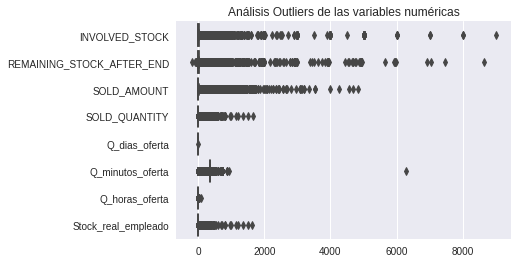

In [46]:
# Deteccion de ouliers en variables numericas
col_out=out_hard_edges.variables.values.tolist()
sns.boxplot(data=Of_relam[col_out], orient="h").set(title='Análisis Outliers de las variables numéricas')
plt.show()

In [47]:
# me quedo con los datos filtrados por el stock mayor o igual a 2000 para evaluar si se sacan o no
out_stock=Of_relam[Of_relam['INVOLVED_STOCK']>=2000]

In [48]:
# agrupamos por vertical y categoría y contamos # resgistros para cada categórica
o1=out_stock.groupby(['VERTICAL','DOM_DOMAIN_AGG1'])['INVOLVED_STOCK'].count().reset_index().sort_values(by=['INVOLVED_STOCK'], ascending=False)
# Cantidad y % de Outliers x vertical y categoría 
o1['STOCK_i/STOCK_TOTAL']=(o1['INVOLVED_STOCK'].div(o1['INVOLVED_STOCK'].sum()))*100
o1=o1.rename(columns={'INVOLVED_STOCK': 'Q_out_stock', 'STOCK_i/STOCK_TOTAL': 'out_stock_i/out_stock_TOTAL(%)'})
o1.head()

,VERTICAL,DOM_DOMAIN_AGG1,Q_out_stock,out_stock_i/out_stock_TOTAL(%)
3,BEAUTY & HEALTH,PHARMACEUTICS,75,70.093458
2,BEAUTY & HEALTH,BEAUTY EQUIPMENT,24,22.429907
4,CE,MOBILE,4,3.738318
0,APP & SPORTS,APPAREL,3,2.803738
1,APP & SPORTS,APPAREL ACCESORIES,1,0.934579


BEAUTY & HEALTH concentra la mayor cantidad de outliers de la muestra con más del 92% del total, y en particular la categoría de PHARMACEUTICS con el 70% de los outliers. Comportamiento esperable dada la situación de pandemia.

In [49]:
# recuento ouliers
at=out_stock.groupby(['VERTICAL','DOM_DOMAIN_AGG1','DOMAIN_ID'])['INVOLVED_STOCK'].count().reset_index().sort_values(by=['INVOLVED_STOCK'], ascending=False)
at['out_stock_i/out_stock_TOTAL(%)']=(at['INVOLVED_STOCK'].div(at['INVOLVED_STOCK'].sum()))*100
at=at.rename(columns={'INVOLVED_STOCK': 'Q_out_stock'})
at

,VERTICAL,DOM_DOMAIN_AGG1,DOMAIN_ID,Q_out_stock,out_stock_i/out_stock_TOTAL(%)
4,BEAUTY & HEALTH,PHARMACEUTICS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,70,65.420561
3,BEAUTY & HEALTH,BEAUTY EQUIPMENT,MLM-OXIMETERS,21,19.626168
5,BEAUTY & HEALTH,PHARMACEUTICS,MLM-THERMOMETERS,5,4.672897
6,CE,MOBILE,MLM-CELLPHONES,4,3.738318
0,APP & SPORTS,APPAREL,MLM-T_SHIRTS,3,2.803738
2,BEAUTY & HEALTH,BEAUTY EQUIPMENT,MLM-DISPOSABLE_GLOVES,3,2.803738
1,APP & SPORTS,APPAREL ACCESORIES,MLM-WRISTWATCHES,1,0.934579


Los productos con más outliers se corresponden a SURGICAL AND INDUSTRIAL MASKS y a los OXIMETERS, con alrededor más del 80% total outliers.

In [50]:
fig = px.bar(at, x="DOM_DOMAIN_AGG1", y="Q_out_stock", color="VERTICAL", title="cantidad outliers de stock por categoría")
fig.show()

La mayor cantidad de datos atípicos se encuentrean en la vertical BEAUTY & HEALTH, en la categoría PHARMACEUTICS, particularmente con productos de relativos a SURGICAL AND INDUSTRIAL MASKS. 


En general, se suelen eliminar del análisis los datos atípicos que puedan llevar a perturbar el análisis por ser muy grandes o pequeños en valor respecto al resto de la muestra, en este caso, dado que la categoría PHARMACEUTICS	y en junio y julio de 2021 transcurrió el período de pandemia junto a las medidas de encierro de las poblaciones de los países, es esperable, que la demanda por productos farmaceuticos haya aumento sobre todo en el e-commerce. 

De esta forma, tener cantidades de stock altas de máscaras quirúrgicas es esperable y acorde a la realidad. También, por la llegada del teletrabajo es esperable que ciertos productos relacionados a este asunto hayan crecido en demanda y por lo tanto el stock previsto a las ofertas relámpago.

In [51]:
Of_relam["producto"] =Of_relam["DOMAIN_ID"].str.replace("MLM-", "")
Of_relam["producto"] = Of_relam["producto"].str.replace('_',' ')

In [52]:
stock=Of_relam.groupby(['producto', "DOM_DOMAIN_AGG1"])['INVOLVED_STOCK'].sum().reset_index().sort_values(by=['INVOLVED_STOCK'], ascending=False)
fig = px.bar(stock.head(10), x='producto', y="INVOLVED_STOCK", color='DOM_DOMAIN_AGG1', title="Top 10 productos del stock previsto por categoría")
fig.show()

### Armado del dataframe de base para el EDA

In [53]:
df=Of_relam.set_index('OFFER_START_DATE')
df.head(3)

,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,Q_dias_oferta,Q_minutos_oferta,Q_horas_oferta,Stock_Negativo,Stock_real_empleado,producto
OFFER_START_DATE,,,,,,,,,,,,,,,,,
2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:00+00:00,lightning_deal,7,7,0.0,0.0,free_shipping,FOOTWEAR,APP & SPORTS,MLM-SNEAKERS,0,0.0,0.0,P,0,SNEAKERS
2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:00+00:00,lightning_deal,8,8,0.0,0.0,free_shipping,FOOTWEAR,APP & SPORTS,MLM-SNEAKERS,0,0.0,0.0,P,0,SNEAKERS
2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:00+00:00,lightning_deal,11,11,0.0,0.0,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-HANDBAGS,0,0.0,0.0,P,0,HANDBAGS


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48746 entries, 2021-06-01 to 2021-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 1   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 2   OFFER_TYPE                 48746 non-null  object             
 3   INVOLVED_STOCK             48746 non-null  int64              
 4   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 5   SOLD_AMOUNT                48746 non-null  float64            
 6   SOLD_QUANTITY              48746 non-null  float64            
 7   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 8   DOM_DOMAIN_AGG1            48746 non-null  object             
 9   VERTICAL                   48746 non-null  object             
 10  DOMAIN_ID                  48746 non-null  object    

In [55]:
df = df.astype({ 'Q_dias_oferta': 'int', 'Q_horas_oferta': 'int', 	'Q_minutos_oferta': 'int'})

In [56]:
df['anio'] = pd.DatetimeIndex(df.index).year
df['mes'] = pd.DatetimeIndex(df.index).month
df['dia'] = pd.DatetimeIndex(df.index).day
df['weekday']=pd.DatetimeIndex(df.index).dayofweek
df['Weekday']=pd.DatetimeIndex(df.index).day_name()

In [57]:
df.Q_dias_oferta.unique()

array([0, 4])

In [58]:
df.Q_horas_oferta.unique()

array([  0,   3,   5,   6,   8,   1,   2,   4,   7, 104,   9,  15,  10,
        14,  12,  11])

In [59]:
df.OFFER_TYPE.unique()

array(['lightning_deal'], dtype=object)

In [60]:
df.SHIPPING_PAYMENT_TYPE.unique()

array(['free_shipping', 'none'], dtype=object)

In [61]:
# Verticales o categorías de primer nivel
df.VERTICAL.unique()

array(['APP & SPORTS', 'CE', 'ACC', 'HOME & INDUSTRY', 'BEAUTY & HEALTH',
       'T & B', 'CPG', 'OTHERS', 'ENTERTAINMENT'], dtype=object)

In [62]:
# categorías de productos dentro de las verticales
df['DOM_DOMAIN_AGG1'].unique()

array(['FOOTWEAR', 'APPAREL ACCESORIES', 'COMPUTERS', 'MOBILE', 'SPORTS',
       'ELECTRONICS', 'VEHICULAR MULTIMEDIA', 'TOOLS AND CONSTRUCTION',
       'PERSONAL CARE', 'TOYS AND GAMES', 'BEAUTY EQUIPMENT', 'CLEANING',
       'AUTOPARTS', 'HOME&DECOR', 'PHARMACEUTICS', 'SUPLEMENTS',
       'STATIONARY', 'INDUSTRY', 'FOODS', 'SECURITY', 'APPAREL',
       'PET PRODUCTS', 'BABY', 'OTHER', 'BOOKS, MULTIMEDIA & OTHER E!',
       'PERSONAL HYGIENE', 'ACC TOOLS', 'BATTERIES', 'WHEELS & TIRES',
       'ANTIQUES & HOBBIES', 'PARTY', 'DRINKS', 'PETS FOOD', 'MOTOPARTS',
       'MUSICAL INSTRUMENTS', 'AGRO'], dtype=object)

In [63]:
# cantiad de verticales, categorías y productos
df[['VERTICAL','DOM_DOMAIN_AGG1', 'producto']].nunique()

VERTICAL              9
DOM_DOMAIN_AGG1      36
producto           1266
dtype: int64

In [64]:
df[['OFFER_START_DTTM', 'OFFER_FINISH_DTTM']].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
OFFER_START_DTTM,48746,2021-07-06 00:35:32.408813056+00:00,2021-06-01 07:00:00+00:00,2021-06-22 15:00:00+00:00,2021-07-07 18:00:00+00:00,2021-07-21 12:00:00+00:00,2021-07-31 19:00:00+00:00
OFFER_FINISH_DTTM,48746,2021-07-06 06:18:02.448713472+00:00,2021-06-01 07:00:00+00:00,2021-06-22 21:22:13+00:00,2021-07-08 00:00:00+00:00,2021-07-21 15:03:39.750000128+00:00,2021-08-01 03:00:00+00:00


In [65]:
# cantidad de dias de inicio de oferta
df.OFFER_FINISH_DTTM.max()-df.OFFER_START_DTTM.min()

Timedelta('60 days 20:00:00')

La primer fecha de cierre de ofertas fue el 2021-06-01 a las 7:00 horas con cero minutos mientras que la última fecha de cierre fue el 2021-08-01 a las 03:00 horas con cero minutos.

In [66]:
df_sin_index=df.reset_index()
df_sin_index.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday'],
      dtype='object')

In [67]:
empieza=df_sin_index['OFFER_START_DATE'].min()
termina=df_sin_index['OFFER_START_DATE'].max()

Se cuenta con registros para todo el período de análisis considerado que empieza en el 2021-06-01 y termina el 2021-07-31.

In [68]:
# la serie de tiempo a indexar es continua diariamente
pd.date_range(start = empieza, end = termina, freq = 'D').difference(df_sin_index['OFFER_START_DATE'].drop_duplicates(keep='last'))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

Entre la última fecha de cierre y la primer fecha de inicio de oferta hubo 60 días con 20 horas de intervalo de ofertas.

## Insights Preliminares:  análisis en base a los montos y cantidades de las ventas

## Montos y cantidades totales

In [69]:
print(f'Monto ventas totales en millones {df_sin_index.SOLD_AMOUNT.sum()/1000000}, Cantidad ventas totales en miles {df_sin_index.SOLD_QUANTITY.sum()/1000} ')

Monto ventas totales en millones 1.2586635, Cantidad ventas totales en miles 266.708 


In [70]:
montos_Q=df_sin_index.groupby(['mes'])['SOLD_AMOUNT', 'SOLD_QUANTITY'].sum().reset_index().sort_values(by=['mes','SOLD_AMOUNT', 'SOLD_QUANTITY'], ascending=[True,False,False])
montos_Q

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,mes,SOLD_AMOUNT,SOLD_QUANTITY
0,6,435414.54,87726.0
1,7,823248.96,178982.0


In [71]:
# cambio porcentual de las ventas de junio a julio
montos_Q.pct_change().iloc[1:,1:3]*100

,SOLD_AMOUNT,SOLD_QUANTITY
1,89.072455,104.023893


##### Montos totales por vertical

In [72]:
df_sin_index.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday'],
      dtype='object')

In [73]:
import calendar
df_sin_index['mes_name'] = df_sin_index['mes'].apply(lambda x: calendar.month_abbr[x])

In [74]:
montos_vert=df_sin_index.groupby(['OFFER_START_DATE','VERTICAL', 'Weekday'])['SOLD_AMOUNT'].sum().reset_index().sort_values(by=['OFFER_START_DATE'], ascending=False)

In [75]:
fig = px.line(montos_vert, x='OFFER_START_DATE', y='SOLD_AMOUNT', color='VERTICAL', hover_data=['Weekday'], title='Montos de ventas por vertical')
fig.show()

BEAUTY & HEALTH es la vertical con mayores ventas en monto y mayor variabilidad. Le sigue CE y 'HOME & INDUSTRY', en segundo y tercer lugar.

Entre el 14 y el 15 de julio se dieron las máximas ventas en monto.
Los fines de semana las ventas tienen a alcanzar mínimos relativos con respecto a los picos que se dan en general entre semana. El 15 julio, fue un jueves, cayendo drásticamente para alcanzar un mínimo el domingo siguiente.



In [76]:
montos_vert_w=df_sin_index.groupby(['VERTICAL', 'Weekday'])['SOLD_AMOUNT'].sum().reset_index().sort_values(by=['SOLD_AMOUNT'], ascending=False)
fig = px.bar(montos_vert_w, x='Weekday', y='SOLD_AMOUNT', color='VERTICAL', title='Montos de ventas por según día de la semana y vertical')
fig.show()

In [77]:
montos_m=df_sin_index.groupby([ 'mes'])['SOLD_AMOUNT'].sum().reset_index().sort_values(by=['mes', 'SOLD_AMOUNT' ], ascending=[True, False])
montos_m

,mes,SOLD_AMOUNT
0,6,435414.54
1,7,823248.96


In [78]:
# aumento de las ventas totales en monto de junio a julio
montos_m.SOLD_AMOUNT.pct_change()[1]*100

89.0724549529283

In [79]:
montos_vert_m=df_sin_index.groupby(['VERTICAL', 'mes_name'])['SOLD_AMOUNT'].sum().reset_index().sort_values(by=['mes_name', 'SOLD_AMOUNT' ], ascending=[False, False])
fig = px.bar(montos_vert_m, x='mes_name', y='SOLD_AMOUNT', color='VERTICAL', title='Montos de ventas por mes y vertical')
fig.show()

Analizando la variabilidad de las series, sería interesante poner el foco sobre BEAUTY & HEALTH y CE porque su comportamiento se destaca en relación al resto.

Ninguna serie parecería tener tendencia, sin embargo, se podría analizar la presencia de ciclos y estacionariedades en las dos series recién mencionadas. 

In [80]:
df_sin_index.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday', 'mes_name'],
      dtype='object')

##### Cantidades totales por vertical

Ahora del gráfico de las cantidades de productos vendidos por vertical, se desprende que 'BEAUTY & HEALTH' es la sobresale del resto no solo en volumenes vendidos sino que además sus ventas presentan un comportamiento irregular según el día del mes lo que podría indicar un comportamiento estacional en las ventas. Esto implica que la demanda podría concentrarse en algunos días específicos de la semana para luegoc caer drásticamente.

Comparando con los montos, CE (computer and electronics) es una vertical, que no se destaca en cantidades vendidas en las ofertas relámpago como lo hace en montos, indicando que los precios unitarios son altos.

In [81]:
Q_vert=df_sin_index.groupby(['OFFER_START_DATE','VERTICAL', 'Weekday'])['SOLD_QUANTITY'].sum().reset_index().sort_values(by=['OFFER_START_DATE'], ascending=False)
fig = px.line(Q_vert, x='OFFER_START_DATE', y='SOLD_QUANTITY', color='VERTICAL', hover_data=['Weekday'], title='Cantidad de ventas por vertical')
fig.show()

Mientras que el resto de las verticales tendría un comportamiento relativamente estable en el período de ofertas, la vertical BEAUTY & HEALTH se destaca por estar notoriamente por encima del resto y por sus ciclos y cierta periodicidad según el día de la semana.



In [82]:
df_sin_index.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday', 'mes_name'],
      dtype='object')

En términos generales, las ventas totales en cantidad se realizaron los primeros días días de entre semana: martes, lunes y miércoles. Las ventas tienden a ser menores los fines de semana.

In [83]:
Q_tot_w=df_sin_index.groupby(['Weekday'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_QUANTITY', ascending=False)

In [84]:
Q_vert_w=df_sin_index.groupby(['VERTICAL', 'Weekday'])['SOLD_QUANTITY'].sum().reset_index().sort_values(by=['SOLD_QUANTITY'], ascending=False)
fig = px.bar(Q_vert_w, x='Weekday', y='SOLD_QUANTITY', color='VERTICAL', title='Cantidad de ventas por según día de la semana y vertical')
fig.show()

In [85]:
df_sin_index.Q_minutos_oferta.describe()

count    48746.000000
mean       342.390042
std        126.813624
min          0.000000
25%        360.000000
50%        360.000000
75%        360.000000
max       6285.000000
Name: Q_minutos_oferta, dtype: float64

In [86]:
# observo minutos de oferta por intervalos de tiempo
df_sin_index['range_min_of'] = pd.cut(df_sin_index.Q_minutos_oferta, [0,100,200,300,400,500,600,700,800], include_lowest=True)

In [87]:
Q_tot_qmin=df_sin_index.groupby(['range_min_of', 'VERTICAL'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by=['range_min_of','SOLD_QUANTITY'], ascending=[True,False])

In [88]:
Q_tot_qmin.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   range_min_of   5 non-null      category
 1   VERTICAL       5 non-null      object  
 2   SOLD_AMOUNT    5 non-null      float64 
 3   SOLD_QUANTITY  5 non-null      float64 
dtypes: category(1), float64(2), object(1)
memory usage: 893.0+ bytes


In [89]:
Q_tot_qmin.range_min_of=Q_tot_qmin.range_min_of.astype('str')

Las ventas de productos totales, se concentran en los primeros 500 minutos de empezada la oferta, alcanzando picos entre los 400 y 500 primeros minutos.

In [90]:
fig = px.bar(Q_tot_qmin, x='range_min_of', y='SOLD_QUANTITY', color='VERTICAL',title='Cantidades vendidas según minutos de oferta antes del cierre')
fig.update_xaxes(type='category')
fig.show()

Dado que las verticales correspondientes a BEAUTY & HEALTH y CE son las que concentran los mayores montos en ventas y son las categorías con mayor variabilidad, vamos a centrar el análisis en estas dos verticales. El resto tiene un comportamiento relativamente estable en el período de ofertas relámpago. Sería interesante comparar el comportamiento de las ventas de los productos dentro de las verticales distintas a BEAUTY & HEALTH y CE para analizar en qué medida su demanda se ve realmente impactada al aplicar descuentos por breves períodos de tiempo.

### Insights: Análisis de la vertical BEAUTY & HEALTH

In [91]:
bh=df_sin_index[df_sin_index['VERTICAL']=='BEAUTY & HEALTH']
bh.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,...,Stock_Negativo,Stock_real_empleado,producto,anio,mes,dia,weekday,Weekday,mes_name,range_min_of
13,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:02+00:00,lightning_deal,5,5,0.0,0.0,free_shipping,PERSONAL CARE,...,P,0,FACIAL SKIN CARE PRODUCTS,2021,6,1,1,Tuesday,Jun,"(-0.001, 100.0]"
16,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:02+00:00,lightning_deal,15,15,0.0,0.0,none,BEAUTY EQUIPMENT,...,P,0,MICRODERMABRASION MACHINES,2021,6,1,1,Tuesday,Jun,"(-0.001, 100.0]"
25,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:22+00:00,lightning_deal,5,5,0.0,0.0,free_shipping,PERSONAL CARE,...,P,0,FACIAL SKIN CARE PRODUCTS,2021,6,1,1,Tuesday,Jun,"(-0.001, 100.0]"
27,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:22+00:00,lightning_deal,15,15,0.0,0.0,none,PHARMACEUTICS,...,P,0,SURGICAL AND INDUSTRIAL MASKS,2021,6,1,1,Tuesday,Jun,"(-0.001, 100.0]"
38,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:32+00:00,lightning_deal,5,5,0.0,0.0,free_shipping,PHARMACEUTICS,...,P,0,SURGICAL AND INDUSTRIAL MASKS,2021,6,1,1,Tuesday,Jun,"(-0.001, 100.0]"


Filtramos los datos por cantidades vendidas positivas, queremos las ventas que efectivamente se realizaron.

In [92]:
bh_ventas=bh[bh['SOLD_QUANTITY']>0]

In [93]:
print(f'Monto ventas totales en miles {bh_ventas.SOLD_AMOUNT.sum()/1000}, Cantidad ventas totales en miles {bh_ventas.SOLD_QUANTITY.sum()/1000} ')

Monto ventas totales en miles 547.42727, Cantidad ventas totales en miles 178.141 


In [94]:
bh.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday', 'mes_name', 'range_min_of'],
      dtype='object')

Se vendió más cantidad de productos en la vertical B&H en el mes de Julio que en el mes de junio de 2021.

In [95]:
bh_ventas_m=bh_ventas.groupby(['mes'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index()

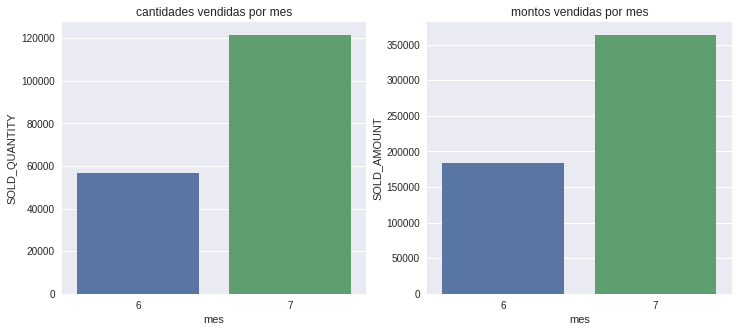

In [96]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.barplot(data=bh_ventas_m, x='mes', y="SOLD_QUANTITY", ax=axs[0]).title.set_text('cantidades vendidas por mes')
sns.barplot(data=bh_ventas_m, x='mes', y='SOLD_AMOUNT', ax=axs[1]).title.set_text('montos vendidas por mes')
plt.show()

Las ventas en montos aumentaron un 98% de junio a julio de 2021 mientas que en cantidad lo hicieron en un 115%, durante el período de ofertas.

In [97]:
bh_ventas_m.set_index('mes').pct_change()[1:]*100

,SOLD_AMOUNT,SOLD_QUANTITY
mes,,
7,97.581259,114.758994


In [98]:
bh_ventas_w=bh_ventas.groupby(['Weekday','DOM_DOMAIN_AGG1' ])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_QUANTITY', ascending=False)

Se venden más cantidades los primeros días de las semanas, considerando que empiezan los lunes, concentrandose en los días martes y lunes, los fines de semana son los días donde las cantidades vendidas son menores. Hacia el fin de semana, las ventas van bajando.

In [99]:
fig = px.bar(bh_ventas_w, x='Weekday', y='SOLD_QUANTITY',color= 'DOM_DOMAIN_AGG1',title='Cantidades vendidas según minutos de oferta antes del cierre')
fig.show()

Dado que ésta vertical es la que más ventas tiene en los períodos de oferta relámpago, es esperable que determine el patrón general de todas las verticales. En este caso, las ventas se realizan casi en su totalidad entre los 400 y 500 minutos de abierta la oferta.

In [100]:
bh_ventas.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday', 'mes_name', 'range_min_of'],
      dtype='object')

In [101]:
bh_ventas['DOM_DOMAIN_AGG1'].unique()

array(['PHARMACEUTICS', 'PERSONAL CARE', 'BEAUTY EQUIPMENT'], dtype=object)

In [102]:
bh_categorias=bh_ventas.groupby(['DOM_DOMAIN_AGG1'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_QUANTITY', ascending=False)
bh_categorias['SOLD_AMOUNT(%)']=(bh_categorias['SOLD_AMOUNT'].div(bh_categorias['SOLD_AMOUNT'].sum()))*100
bh_categorias['SOLD_AMOUNT(%)']=(bh_categorias['SOLD_QUANTITY'].div(bh_categorias['SOLD_QUANTITY'].sum()))*100
bh_categorias.head()

,DOM_DOMAIN_AGG1,SOLD_AMOUNT,SOLD_QUANTITY,SOLD_AMOUNT(%)
2,PHARMACEUTICS,440216.74,147697.0,82.910167
0,BEAUTY EQUIPMENT,88830.25,24300.0,13.640880
1,PERSONAL CARE,18380.28,6144.0,3.448953


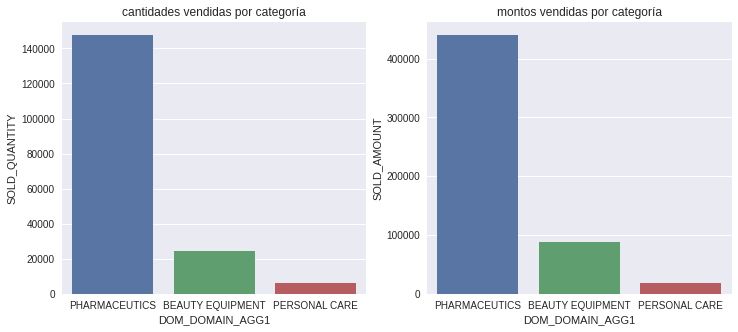

In [103]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.barplot(data=bh_categorias, x='DOM_DOMAIN_AGG1', y="SOLD_QUANTITY", ax=axs[0]).title.set_text('cantidades vendidas por categoría')
sns.barplot(data=bh_categorias, x='DOM_DOMAIN_AGG1', y='SOLD_AMOUNT', ax=axs[1]).title.set_text('montos vendidas por categoría')
plt.show()

En el mes de junio y julio, se vendieron principalmente productos de la categoría PHARMACEUTICS, luego BEAUTY EQUIPMENT y por último PERSONAL CARE. 

In [104]:
bh_ventas.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday', 'mes_name', 'range_min_of'],
      dtype='object')

In [105]:
bh_categorias_mes=bh_ventas.groupby(['mes_name','DOM_DOMAIN_AGG1'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().sort_values(by=['mes_name','SOLD_AMOUNT'], ascending=[False,False])
bh_categorias_mes

SOLD_AMOUNT  SOLD_QUANTITY
mes_name DOM_DOMAIN_AGG1                             
Jun      PHARMACEUTICS       163604.06        51518.0
         BEAUTY EQUIPMENT     14572.05         3227.0
         PERSONAL CARE         5782.81         1851.0
Jul      PHARMACEUTICS       276612.68        96179.0
         BEAUTY EQUIPMENT     74258.20        21073.0
         PERSONAL CARE        12597.47         4293.0

Las ventas relativas a la categoría PHARMACEUTICS aumentaron en valor un 69% de junio a julio, mientras que en cantidades fue del 87%.

In [106]:
bh_categorias_mes.filter(like ='PHARMACEUTICS', axis=0).pct_change()[1:]*100

,,SOLD_AMOUNT,SOLD_QUANTITY
mes_name,DOM_DOMAIN_AGG1,,
Jul,PHARMACEUTICS,69.074459,86.690089


In [107]:
PHARMACEUTICS_por_mes=bh_categorias_mes.filter(like ='PHARMACEUTICS', axis=0).reset_index()

Las ventas relativas a la categoría BEAUTY EQUIPMENT aumentaron en valor un poco más del 409% de junio a julio, mientras que en cantidades fue más del 550%.

In [108]:
bh_categorias_mes.filter(like ='BEAUTY EQUIPMENT', axis=0).pct_change()[1:]*100

,,SOLD_AMOUNT,SOLD_QUANTITY
mes_name,DOM_DOMAIN_AGG1,,
Jul,BEAUTY EQUIPMENT,409.593365,553.021382


In [109]:
BEAUTY_EQUIPMENT_por_mes=bh_categorias_mes.filter(like ='BEAUTY EQUIPMENT', axis=0).reset_index()
BEAUTY_EQUIPMENT_por_mes.columns

Index(['mes_name', 'DOM_DOMAIN_AGG1', 'SOLD_AMOUNT', 'SOLD_QUANTITY'], dtype='object')

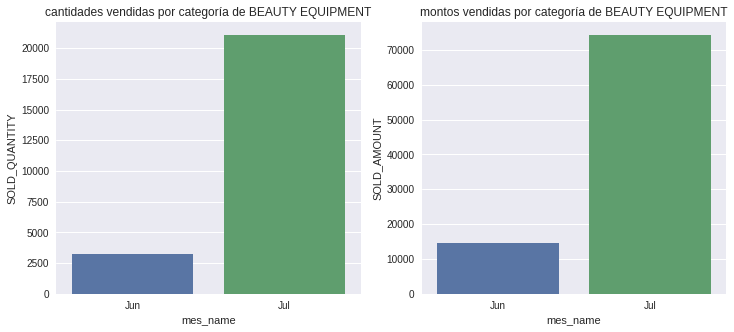

In [110]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.barplot(data=BEAUTY_EQUIPMENT_por_mes, x='mes_name', y="SOLD_QUANTITY", ax=axs[0]).title.set_text('cantidades vendidas por categoría de BEAUTY EQUIPMENT')
sns.barplot(data=BEAUTY_EQUIPMENT_por_mes, x='mes_name', y='SOLD_AMOUNT', ax=axs[1]).title.set_text('montos vendidas por categoría de BEAUTY EQUIPMENT')
plt.show()

Las ventas relativas a la categoría PERSONAL CARE aumentaron en valor un poco más del 118% de junio a julio, mientras que en cantidades fue del 132%.

In [111]:
bh_categorias_mes.filter(like ='PERSONAL CARE', axis=0).reset_index()

,mes_name,DOM_DOMAIN_AGG1,SOLD_AMOUNT,SOLD_QUANTITY
0,Jun,PERSONAL CARE,5782.81,1851.0
1,Jul,PERSONAL CARE,12597.47,4293.0


In [112]:
# cambio porcentual de junio a julio
bh_categorias_mes.filter(like ='PERSONAL CARE', axis=0).pct_change()[1:]*100

,,SOLD_AMOUNT,SOLD_QUANTITY
mes_name,DOM_DOMAIN_AGG1,,
Jul,PERSONAL CARE,117.843401,131.928687


###### Productos más vendidos dentro de PHARMACEUTICS

In [113]:
pharma=bh[bh.DOM_DOMAIN_AGG1=='PHARMACEUTICS']

In [114]:
pharma_vtas=pharma[pharma.SOLD_QUANTITY>0]

In [115]:
ph_prod=pharma_vtas.groupby(['producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_QUANTITY', ascending=False)

In [116]:
ph_prod_mes=pharma_vtas.groupby(['mes_name','producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='mes_name', ascending=False)

In [117]:
ph_prod_mes_wide=pd.pivot(ph_prod_mes, index=['mes_name'], columns = 'producto',values = 'SOLD_QUANTITY').fillna(0).reset_index()
ph_prod_mes_wide=ph_prod_mes_wide.sort_values(by='mes_name', ascending=False)

In [118]:
ph_prod_mes_wide_index=ph_prod_mes_wide.set_index('mes_name')

In [119]:
ph_prod_mes.columns

Index(['mes_name', 'producto', 'SOLD_AMOUNT', 'SOLD_QUANTITY'], dtype='object')

In [120]:
import plotly.express as px
fig = px.bar(ph_prod_mes, x='mes_name', y="SOLD_QUANTITY", color="producto", title="Cantidad de productos vendidos en PHARMA")
fig.show()

In [121]:
# top ten best sellers
ph_prod.sort_values(by=['SOLD_QUANTITY', 'SOLD_AMOUNT'], ascending=[False, False]).head(5)

,producto,SOLD_AMOUNT,SOLD_QUANTITY
25,SURGICAL AND INDUSTRIAL MASKS,410363.30,141369.0
26,THERMOMETERS,9504.12,3777.0
15,OIL DIFFUSERS,2758.92,755.0
1,BLOOD PRESSURE MONITORS,4057.92,716.0
6,ESSENTIAL OILS,1402.14,423.0


In [122]:
ph_prod_mes_wide_index_pct_change=ph_prod_mes_wide_index.pct_change()
ph_prod_mes_wide_index_pct_change.replace([np.inf, - np.inf], np.nan, inplace = True) 
var_ph=ph_prod_mes_wide_index_pct_change.iloc[1: , :]
var_ph=var_ph.dropna(axis=1)
var_ph=var_ph*100
var_ph

producto,ANTIBACTERIAL GELS,BLOOD PRESSURE MONITORS,BUNION CORRECTORS,COMPRESSION SOCKS,CONTACT LENS CLEANING SOLUTIONS,COUGH COLD AND FLU MEDICINES,ESSENTIAL OILS,HEATING PADS,HOT WATER BOTTLES,KNEE BRACES SUPPORTS,...,OIL DIFFUSERS,ORTHOPEDICS,ORTHOTICS,OXYGEN CONCENTRATORS,PILL BOXES,REUSABLE MASKS,SPHYGMOMANOMETERS,SPORT AND MEDICAL BANDAGES,SURGICAL AND INDUSTRIAL MASKS,THERMOMETERS
mes_name,,,,,,,,,,,,,,,,,,,,,
Jul,100.0,-87.598116,-100.0,-100.0,-100.0,-100.0,85.810811,-100.0,-100.0,-100.0,...,394.488189,-100.0,-100.0,220.0,-100.0,142.857143,-100.0,-100.0,91.35632,8.099174


In [123]:
# variacion de las ventas de junio a julio
var_ph[['SURGICAL AND INDUSTRIAL MASKS','THERMOMETERS']]

producto,SURGICAL AND INDUSTRIAL MASKS,THERMOMETERS
mes_name,,
Jul,91.35632,8.099174


Se puede notar el efecto de la pandemia sobre las compras de productos farmacéuticos, dado que es su mayoría se compraron SURGICAL AND INDUSTRIAL MASKS y su demando creció durante las ofertas un 91%. También se destacan los termómetros por sus cantidades vendidas, aumentando un 8% entre los meses de estudio.

###### Productos más vendidos dentro de BEAUTY EQUIPMENT

In [124]:
beauty=bh[bh.DOM_DOMAIN_AGG1=='BEAUTY EQUIPMENT']

In [125]:
beauty_vtas=beauty[beauty.SOLD_QUANTITY>0]

In [126]:
beauty_prod=beauty_vtas.groupby(['producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_QUANTITY', ascending=False)

In [127]:
beauty_prod_mes=beauty_vtas.groupby(['mes_name','producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by=['mes_name','SOLD_QUANTITY'], ascending=[False,False])

In [128]:
beauty_prod_mes_wide=pd.pivot(beauty_prod_mes, index=['mes_name'], columns = 'producto',values = 'SOLD_QUANTITY').fillna(0).reset_index()

In [129]:
beauty_prod_mes_wide_index=beauty_prod_mes_wide.set_index('mes_name')

In [130]:
import plotly.express as px
fig = px.bar(beauty_prod_mes, x='mes_name', y="SOLD_QUANTITY", color="producto", title="Cantidad de productos vendidos en BEAUTY EQUIPMENT")
fig.show()

In [131]:
beauty_categorias_mes=beauty_vtas.groupby(['mes_name','DOM_DOMAIN_AGG1'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().sort_values(by=['mes_name','SOLD_AMOUNT'], ascending=[False,False])
beauty_categorias_mes

,,SOLD_AMOUNT,SOLD_QUANTITY
mes_name,DOM_DOMAIN_AGG1,,
Jun,BEAUTY EQUIPMENT,14572.05,3227.0
Jul,BEAUTY EQUIPMENT,74258.20,21073.0


In [132]:
beauty_categorias_mes.SOLD_AMOUNT.sum(), beauty_categorias_mes.SOLD_QUANTITY.sum()

(88830.25, 24300.0)

In [133]:
beauty_categorias_mes.pct_change()[1:]*100

,,SOLD_AMOUNT,SOLD_QUANTITY
mes_name,DOM_DOMAIN_AGG1,,
Jul,BEAUTY EQUIPMENT,409.593365,553.021382


Los producto más vendidos durante la oferta fueron los guantes desechables, oxímetros y balanzas corporales en un tercer lugar marginal.

Para el mes de junio los 5 productos más vendidos (top 5 sellers) fueron los siguientes:

In [134]:
beauty_prod_mes.columns

Index(['mes_name', 'producto', 'SOLD_AMOUNT', 'SOLD_QUANTITY'], dtype='object')

In [135]:
beauty_prod=beauty_vtas.groupby(['producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().sort_values(by=['SOLD_AMOUNT'], ascending=[False])
beauty_prod.head()

,SOLD_AMOUNT,SOLD_QUANTITY
producto,,
DISPOSABLE GLOVES,55365.39,13477.0
OXIMETERS,17606.61,8632.0
PORTABLE ELECTRIC MASSAGERS,6919.43,521.0
BODYWEIGHT SCALES,4327.32,1058.0
HEALTH CARE SUPPLIES,2028.03,416.0


In [136]:
be_prod_mes=beauty_vtas.groupby(['mes_name','producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by=['mes_name','SOLD_QUANTITY'], ascending=False)

In [137]:
fig = px.bar(be_prod_mes, x='mes_name', y="SOLD_QUANTITY", color="producto", title="Cantidad de productos vendidos en BEAUTY EQUIPMENT")
fig.show()

In [138]:
be_prod_mes['producto'].unique()

array(['DISPOSABLE GLOVES', 'OXIMETERS', 'BODYWEIGHT SCALES',
       'HEALTH CARE SUPPLIES', 'PORTABLE ELECTRIC MASSAGERS',
       'EPILATORS AND TRIMMERS', 'MEDICAL EQUIPMENT',
       'ORTHOPEDIC ANKLE BRACES', 'ELECTRIC FACIAL BRUSHES AND SPONGES',
       'MICRODERMABRASION MACHINES', 'CURLING IRONS', 'ELECTRODE PADS',
       'ELECTRONIC MUSCLE STIMULATORS', 'MEDICAL TOURNIQUETS',
       'STETHOSCOPES', 'MANUAL MASSAGERS', 'BLOOD GLUCOSE METERS',
       'ELECTRIC TOOTHBRUSHES', 'MASSAGE EQUIPMENT',
       'PRESSOTHERAPY MACHINES',
       'MANICURE AND PEDICURE ELECTRONIC EXFOLIATORS AND FILES',
       'SANITIZING GUNS', 'AESTHETIC TREATMENT TABLES AND CHAIRS',
       'FOOT BATH MASSAGERS', 'SALON TROLLEYS'], dtype=object)

In [139]:
be_prod_mes[be_prod_mes['producto']=='DISPOSABLE GLOVES']

,mes_name,producto,SOLD_AMOUNT,SOLD_QUANTITY
16,Jun,DISPOSABLE GLOVES,9894.78,2337.0
4,Jul,DISPOSABLE GLOVES,45470.61,11140.0


In [140]:
be_prod_mes[be_prod_mes['producto']=='OXIMETERS']

,mes_name,producto,SOLD_AMOUNT,SOLD_QUANTITY
30,Jun,OXIMETERS,585.02,274.0
9,Jul,OXIMETERS,17021.59,8358.0


### Insights: Análisis de la vertical CE

In [141]:
ce=df_sin_index[df_sin_index['VERTICAL']=='CE']

In [142]:
ce_vtas=ce[ce.SOLD_QUANTITY>0]

In [143]:
ce_vtas['precio unitario prom']=ce_vtas['SOLD_AMOUNT'].div(ce_vtas['SOLD_QUANTITY'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Existen tres categorías de dentro de la vertical Computer and Electronics:

In [144]:
ce.DOM_DOMAIN_AGG1.unique()

array(['COMPUTERS', 'MOBILE', 'ELECTRONICS'], dtype=object)

Se ofrecieron un total de 185 productos dentro de esta categoría:

In [145]:
ce.producto.nunique()

185

In [146]:
ce_vtas_categoria=ce_vtas.groupby(['DOM_DOMAIN_AGG1'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_QUANTITY', ascending=False)
ce_vtas_categoria['precio unitario prom']=ce_vtas_categoria['SOLD_AMOUNT'].div(ce_vtas_categoria['SOLD_QUANTITY'])

In [147]:
print(f'Monto ventas totales en miles {ce_vtas_categoria.SOLD_AMOUNT.sum()/1000}, Cantidad ventas totales en miles {ce_vtas_categoria.SOLD_QUANTITY.sum()/1000} ')

Monto ventas totales en miles 362.78794, Cantidad ventas totales en miles 21.833 


Dentro de la vertical CE, la categoría de productos con más ventas en monto y cantidad fue la de celulares, con precios promedio unitarios también más altos en relación al resto.

In [148]:
ce_vtas_categoria.sort_values(by=['SOLD_AMOUNT'], ascending=False)

,DOM_DOMAIN_AGG1,SOLD_AMOUNT,SOLD_QUANTITY,precio unitario prom
2,MOBILE,158992.21,5511.0,28.849975
1,ELECTRONICS,119853.95,5157.0,23.241022
0,COMPUTERS,83941.78,11165.0,7.518296


In [149]:
ce_vtas_productos_por_cat=ce_vtas.groupby(['DOM_DOMAIN_AGG1','producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_AMOUNT', ascending=False)
ce_vtas_productos_por_cat.head()

,DOM_DOMAIN_AGG1,producto,SOLD_AMOUNT,SOLD_QUANTITY
130,MOBILE,CELLPHONES,111678.79,1769.0
107,ELECTRONICS,TELEVISIONS,66366.08,451.0
18,COMPUTERS,HEADPHONES,29628.06,4447.0
135,MOBILE,SMARTWATCHES,21572.06,1325.0
138,MOBILE,TABLETS,19123.19,405.0


In [150]:
ce_vtas_productos=ce_vtas.groupby(['producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_AMOUNT', ascending=False)
ce_vtas_productos.head()

,producto,SOLD_AMOUNT,SOLD_QUANTITY
24,CELLPHONES,111678.79,1769.0
120,TELEVISIONS,66366.08,451.0
66,HEADPHONES,29628.06,4447.0
110,SMARTWATCHES,21572.06,1325.0
118,TABLETS,19123.19,405.0


In [151]:
ce_vtas_productos_mes=ce_vtas.groupby(['mes','producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by=['mes','SOLD_AMOUNT'], ascending=[False,False])
ce_vtas_productos_mes['precio prom unitario']=ce_vtas_productos_mes['SOLD_AMOUNT'].div(ce_vtas_productos_mes['SOLD_QUANTITY'])
ce_vtas_productos_mes.sort_values(by=['SOLD_QUANTITY','precio prom unitario'], ascending=[False,False]).head()

,mes,producto,SOLD_AMOUNT,SOLD_QUANTITY,precio prom unitario
166,7,HEADPHONES,19178.95,3238.0,5.923085
139,7,CELLPHONES,85632.47,1367.0,62.642626
58,6,HEADPHONES,10449.11,1209.0,8.642771
194,7,SMARTWATCHES,12700.49,902.0,14.080366
142,7,COMPUTER MICE,1872.17,734.0,2.550640


Dentro de los 5 tops sellers, los prductos con más ventas, considerando los dos meses fueron los auriculares (HEADPHONES) y luego los celulares, sin embargo dentro de esta lista de los 5 más vendidos, el producto con mayor valor unitario promedio son los celulares.

In [152]:
import calendar
ce_vtas_productos_mes['mes_name'] = ce_vtas_productos_mes['mes'].apply(lambda x: calendar.month_abbr[x])

In [153]:
ce_vtas_productos_mes=ce_vtas_productos_mes.sort_values(by=["mes_name", "SOLD_AMOUNT", "SOLD_QUANTITY"], ascending=[False, False, False])

In [154]:
import plotly.express as px
fig = px.bar(ce_vtas_productos_mes, x="mes_name", y="SOLD_AMOUNT", color="producto", title="Montos de productos vendidos en CE")
fig.update_xaxes(categoryorder='array', categoryarray= ['Jun','Jul'])
fig.show()

In [155]:
import plotly.express as px
fig = px.bar(ce_vtas_productos_mes, x="mes_name", y="SOLD_QUANTITY", color="producto", title="Cantidad de productos vendidos en CE")
fig.update_xaxes(categoryorder='array', categoryarray= ['Jun','Jul'])
fig.show()

Dada la disparidad de precios unitarios dentro de la vertical CE, cuando se comparan las ventas en montos celulares, televisores y auriculares son los que reportan mayores montos vendidos porque presentan mayores precios unitarios. 

Ahora, cuando se analizan las ventas en volumen, parecería, sobre todo en junio, que la distribución de las mismas sería más pareja entre productos considerando que los productos más demandado fueron los headphones.

In [156]:
ce_vtas_productos_mes=ce_vtas.groupby(["mes_name",'producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by=["mes_name",'SOLD_QUANTITY'], ascending=[False, False])


In [157]:
ce_vtas_productos=ce_vtas.groupby(["mes_name"])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by=["mes_name",'SOLD_QUANTITY'], ascending=[False, False])

In [158]:
fig = px.bar(ce_vtas_productos_mes, x="mes_name", y='SOLD_QUANTITY', color="producto", title="Montos de productos vendidos en CE")
fig.show()

Las ventas totales de productos de la vertical CE de junio a julio, creció en monto más de un 107% mientras que en cantidades casi aumenta un 140%.

In [159]:
ce_vtas_productos.set_index("mes_name").sort_index().sort_values(by="mes_name", ascending=False).pct_change()[1:]*100

,SOLD_AMOUNT,SOLD_QUANTITY
mes_name,,
Jul,107.856804,139.390642


En particular, las ventas de auriculares crecieron en monto un 84% mientras que en cantidad un 168% de junio a julio. Este fenómeno se podría asociar al incremento del teletrabajo durante el período de lockdown en pandemia.

In [160]:
auri_vtas=ce_vtas_productos_mes[ce_vtas_productos_mes['producto']=='HEADPHONES']
auri_vtas=auri_vtas.set_index("mes_name").sort_index(ascending=False).drop(['producto'], axis=1)

In [161]:
auri_vtas.pct_change()[1:]*100

,SOLD_AMOUNT,SOLD_QUANTITY
mes_name,,
Jul,83.546254,167.824648


In [162]:
df.VERTICAL.unique()

array(['APP & SPORTS', 'CE', 'ACC', 'HOME & INDUSTRY', 'BEAUTY & HEALTH',
       'T & B', 'CPG', 'OTHERS', 'ENTERTAINMENT'], dtype=object)

### Insights: Análisis del resto de las verticales (que no son CE ni BEAUTY & HEALTH)

El resto de las verticales están compuestas por 'APP & SPORTS', 'ACC', 'HOME & INDUSTRY','T & B', 'CPG', 'OTHERS', 'ENTERTAINMENT'

In [163]:
resto=df_sin_index.query("VERTICAL not in ('BEAUTY & HEALTH','CE')")

In [164]:
resto.VERTICAL.unique()

array(['APP & SPORTS', 'ACC', 'HOME & INDUSTRY', 'T & B', 'CPG', 'OTHERS',
       'ENTERTAINMENT'], dtype=object)

In [165]:
resto.VERTICAL.nunique()

7

In [166]:
resto_vtas=resto[resto.SOLD_QUANTITY>0]
resto_vtas.shape

(15622, 25)

In [167]:
resto_vtas.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'Q_dias_oferta',
       'Q_minutos_oferta', 'Q_horas_oferta', 'Stock_Negativo',
       'Stock_real_empleado', 'producto', 'anio', 'mes', 'dia', 'weekday',
       'Weekday', 'mes_name', 'range_min_of'],
      dtype='object')

In [168]:
print(f'Monto ventas totales en miles {round(resto_vtas.SOLD_AMOUNT.sum()/1000,3)}, Cantidad ventas totales en miles {round(resto_vtas.SOLD_QUANTITY.sum()/1000,3)} ')

Monto ventas totales en miles 348.448, Cantidad ventas totales en miles 66.734 


In [169]:
resto_vtas.groupby(['VERTICAL'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by='SOLD_QUANTITY', ascending=False)

,VERTICAL,SOLD_AMOUNT,SOLD_QUANTITY
4,HOME & INDUSTRY,155518.68,27161.0
1,APP & SPORTS,131101.36,25658.0
2,CPG,16787.68,5696.0
0,ACC,26819.98,5156.0
6,T & B,14302.78,2349.0
3,ENTERTAINMENT,1988.57,357.0
5,OTHERS,1929.24,357.0


In [170]:
resto_vtas_cat_prod=resto_vtas.groupby(['VERTICAL','DOM_DOMAIN_AGG1','producto'])[['SOLD_AMOUNT', 'SOLD_QUANTITY']].sum().reset_index().sort_values(by=['SOLD_AMOUNT','SOLD_QUANTITY'], ascending=[False,False])
resto_vtas_cat_prod.head()

,VERTICAL,DOM_DOMAIN_AGG1,producto,SOLD_AMOUNT,SOLD_QUANTITY
127,APP & SPORTS,FOOTWEAR,SNEAKERS,12004.28,1023.0
460,HOME & INDUSTRY,SECURITY,SURVEILLANCE CAMERAS,10298.34,1114.0
364,HOME & INDUSTRY,HOME&DECOR,LED STRIPS,9858.15,1983.0
110,APP & SPORTS,APPAREL ACCESORIES,SUNGLASSES,7992.00,1506.0
419,HOME & INDUSTRY,INDUSTRY,CARD PAYMENT TERMINALS,7465.46,715.0


In [171]:
fig = px.bar(resto_vtas_cat_prod, x='DOM_DOMAIN_AGG1', y='SOLD_AMOUNT', color="producto", title="Montos de productos vendidos en el resto")
fig.show()